## Sampling Corona Model

In [1]:
%matplotlib inline

from model import num_infected

import pyro
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
params = {
    'distancing': 0.3,
    'normal_contact': 100,
    'distance_contact': 30,
    'normal_ir_conc': (3, 27),
    'distance_ir_conc': (6, 24),
}


samples = []
for _ in range(1000):
    samples.append(num_infected())

samples = pd.DataFrame(samples, columns=['Protocol', 'Contacted People', 'Infection Rate', 'Infected People'])
samples['Protocol'] = samples['Protocol'].astype("category")

samples.head(10)

,Protocol,Contacted People,Infection Rate,Infected People
0,normal_behavior,91.0,0.252101,23.0
1,social_distancing,29.0,0.113900,2.0
2,normal_behavior,108.0,0.203353,20.0
3,normal_behavior,119.0,0.234643,32.0
4,social_distancing,36.0,0.160505,4.0
5,social_distancing,28.0,0.102006,4.0
6,normal_behavior,116.0,0.195223,19.0
7,social_distancing,40.0,0.221368,6.0
8,social_distancing,34.0,0.189889,5.0
9,social_distancing,29.0,0.073780,4.0


In [3]:
cols = ['Contacted People', 'Infection Rate', 'Infected People']

normal_behavior = samples[samples['Protocol'] == 'normal_behavior']
normal_behavior = normal_behavior[cols]

social_distance = samples[samples['Protocol'] == 'social_distancing']
social_distance = social_distance[cols]

### Normal Behavior Plots

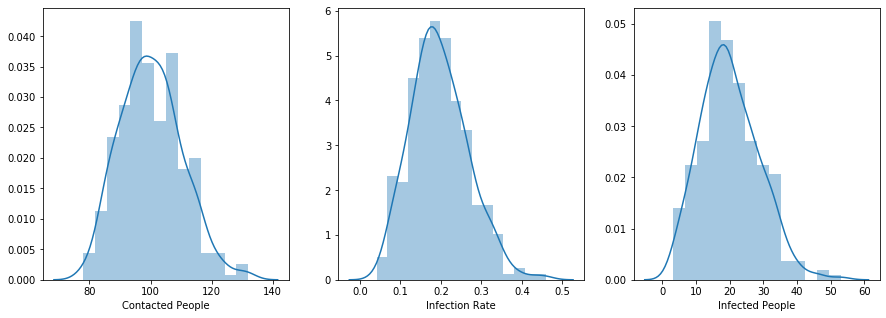

In [4]:
fig, axs = plt.subplots(figsize=(15, 5), ncols=3)
sns.distplot(normal_behavior['Contacted People'], ax=axs[0])
sns.distplot(normal_behavior['Infection Rate'], ax=axs[1])
sns.distplot(normal_behavior['Infected People'], ax=axs[2])

### Social Distancing Plots

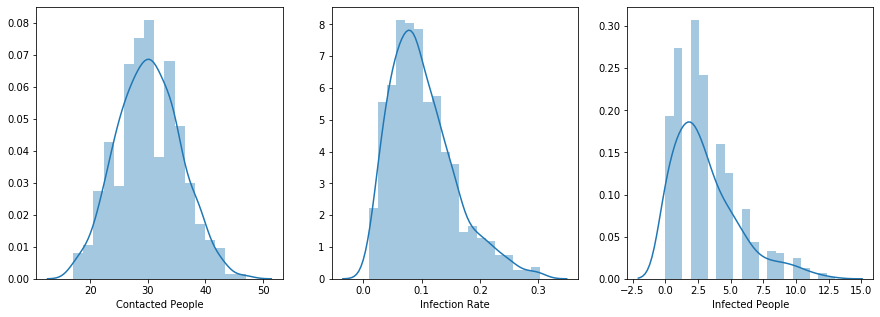

In [5]:
fig, axs = plt.subplots(figsize=(15, 5), ncols=3)
sns.distplot(social_distance['Contacted People'], ax=axs[0])
sns.distplot(social_distance['Infection Rate'], ax=axs[1])
sns.distplot(social_distance['Infected People'], ax=axs[2])